<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/redeslstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving AAPL_2006-01-01_to_2018-01-01.csv to AAPL_2006-01-01_to_2018-01-01.csv


In [ ]:
import io
precios_file = io.BytesIO(uploaded['AAPL_2006-01-01_to_2018-01-01.csv'])
precios = pd.read_csv(precios_file, sep = ",", index_col= 'Date', encoding="latin-1")
precios.head(4)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL


In [ ]:
set_entrenamiento = precios[:'2016'].iloc[:,1:2]
set_validacion = precios['2017':].iloc[:,1:2]
set_validacion

,High
Date,
2017-01-03,116.33
2017-01-04,116.51
2017-01-05,116.86
2017-01-06,118.16
2017-01-09,119.43
...,...
2017-12-22,175.42
2017-12-26,171.47
2017-12-27,170.78


In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Importar MinMaxScaler, no StandardScaler
sc = MinMaxScaler(feature_range=(0, 1))  # Crear una instancia de MinMaxScaler
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)
set_entrenamiento_escalado[1:60,0]

array([0.02590959, 0.0247283 , 0.02677587, 0.02732714, 0.03260356,
       0.03583241, 0.03764372, 0.03724996, 0.03764372, 0.03504489,
       0.0323673 , 0.03047724, 0.03000473, 0.02984722, 0.02764215,
       0.02535832, 0.02323201, 0.02661837, 0.02638211, 0.02646086,
       0.02527957, 0.02236573, 0.02205072, 0.01866436, 0.01819184,
       0.01834935, 0.01661679, 0.01559301, 0.01708931, 0.01882186,
       0.02031816, 0.02023941, 0.0200819 , 0.02110569, 0.02260198,
       0.02244448, 0.0215782 , 0.02189321, 0.01866436, 0.01921562,
       0.01913687, 0.01661679, 0.01575051, 0.01606552, 0.015278  ,
       0.01299417, 0.01504174, 0.01622303, 0.01701055, 0.01575051,
       0.01417546, 0.01409671, 0.01283667, 0.01165538, 0.01008033,
       0.00905654, 0.00952906, 0.00811151, 0.0107891 ])

In [ ]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])
    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train

array([[0.0245708 , 0.02590959, 0.0247283 , ..., 0.00952906, 0.00811151,
        0.0107891 ],
       [0.02590959, 0.0247283 , 0.02677587, ..., 0.00811151, 0.0107891 ,
        0.01165538],
       [0.0247283 , 0.02677587, 0.02732714, ..., 0.0107891 , 0.01165538,
        0.01204914],
       ...,
       [0.81469523, 0.81753032, 0.82044416, ..., 0.79768467, 0.79886596,
        0.78854938],
       [0.81753032, 0.82044416, 0.82068042, ..., 0.79886596, 0.78854938,
        0.80225232],
       [0.82044416, 0.82068042, 0.80823752, ..., 0.78854938, 0.80225232,
        0.79650339]])

In [ ]:
print(X_train.shape[0], X_train.shape[1])

2456 60


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape[0], X_train.shape[1])
X_train

2456 60


array([[[0.0245708 ],
        [0.02590959],
        [0.0247283 ],
        ...,
        [0.00952906],
        [0.00811151],
        [0.0107891 ]],

       [[0.02590959],
        [0.0247283 ],
        [0.02677587],
        ...,
        [0.00811151],
        [0.0107891 ],
        [0.01165538]],

       [[0.0247283 ],
        [0.02677587],
        [0.02732714],
        ...,
        [0.0107891 ],
        [0.01165538],
        [0.01204914]],

       ...,

       [[0.81469523],
        [0.81753032],
        [0.82044416],
        ...,
        [0.79768467],
        [0.79886596],
        [0.78854938]],

       [[0.81753032],
        [0.82044416],
        [0.82068042],
        ...,
        [0.79886596],
        [0.78854938],
        [0.80225232]],

       [[0.82044416],
        [0.82068042],
        [0.80823752],
        ...,
        [0.78854938],
        [0.80225232],
        [0.79650339]]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
dim_entrada = (X_train.shape[1],1) # Cada entrada es una secuencia de 60 pasos temporales, con una sola característica por paso temporal.
dim_salida = 1 # El modelo debe predecir un solo valor (por ejemplo, el siguiente valor en la secuencia).
na = 60 # La red tendrá una capa oculta con 60 neuronas, lo que afecta su capacidad de aprendizaje.

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(LSTM(units=na, input_shape=dim_entrada))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.add(Dense(units=dim_salida))

In [ ]:
modelo.compile(optimizer='rmsprop', loss='mse')

In [ ]:
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)
# el modelo se entrenará durante 20 épocas. Cada época es un ciclo completo en el que el modelo pasa por todos los datos de entrenamiento,
# ajustando sus parámetros internos (pesos) en función de los errores cometidos durante la predicción.
# El batch size es 32, lo que significa que en cada paso de optimización el modelo usará un subconjunto de 32 muestras de datos para calcular
# los gradientes y ajustar los pesos.

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0314
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0012
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0010
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.0229e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.4066e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.0324e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.0259e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 3.9642e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.9155e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.4663e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.0369e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 2.9793e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.5582e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.6595e-04
Epoch 15/20
77/77 ━━━━━━━━━

In [ ]:
x_test = set_validacion.values
x_test = sc.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


(191, 1)

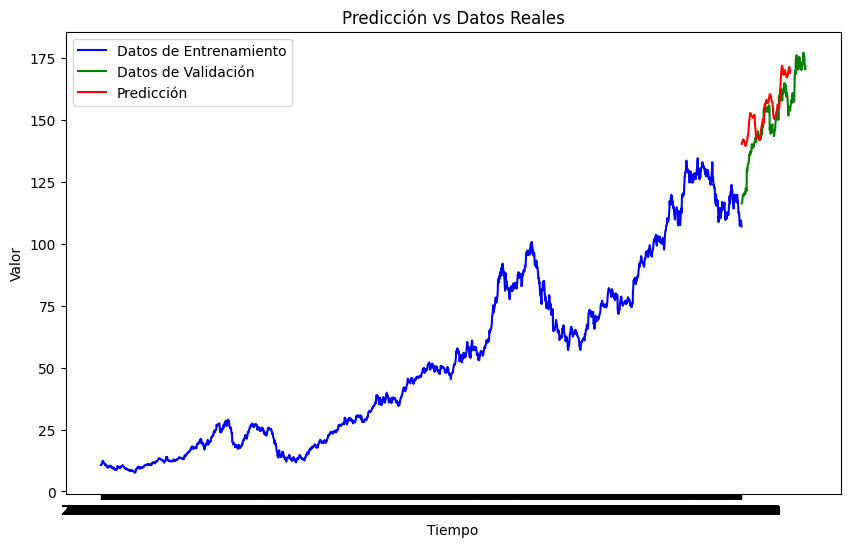

In [ ]:
import matplotlib.pyplot as plt
# Asumimos que 'val_data' es el conjunto de datos reales para la validación
val_data = set_validacion  # Ajusta según el 'time_step'

# Graficamos:
plt.figure(figsize=(10,6))

# Datos de entrenamiento
plt.plot(set_entrenamiento, color='blue', label='Datos de Entrenamiento')

# Datos de validación
plt.plot(range(len(set_entrenamiento), len(set_entrenamiento) + len(val_data)), val_data, color='green', label='Datos de Validación')

# Predicciones
plt.plot(range(len(set_entrenamiento), len(set_entrenamiento) + len(prediccion)), prediccion, color='red', label='Predicción')

# Añadimos etiquetas y título
plt.title('Predicción vs Datos Reales')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
print(prediccion.shape, set_validacion.shape)

(191, 1) (251, 1)


In [ ]:
from sklearn import metrics
metrics.mean_squared_error(set_validacion[:prediccion.shape[0]], prediccion)

113.47818696249149

In [ ]:
n_pasos_futuros = 120
ultima_secuencia = set_entrenamiento_escalado[-time_step:]
ultima_secuencia = np.reshape(ultima_secuencia, (1, time_step, 1))

# Predicciones futuras
predicciones_futuras = []
for _ in range(n_pasos_futuros):
    prediccion = modelo.predict(ultima_secuencia)
    predicciones_futuras.append(prediccion[0, 0])
    prediccion_reshaped = np.reshape(prediccion, (1, 1, 1))
    ultima_secuencia = np.append(ultima_secuencia[:, 1:, :], prediccion_reshaped, axis=1)

predicciones_futuras = np.array(predicciones_futuras)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
predicciones_futuras.shape

(120, 1)

In [ ]:
predicciones_futuras1 = sc.inverse_transform(predicciones_futuras)

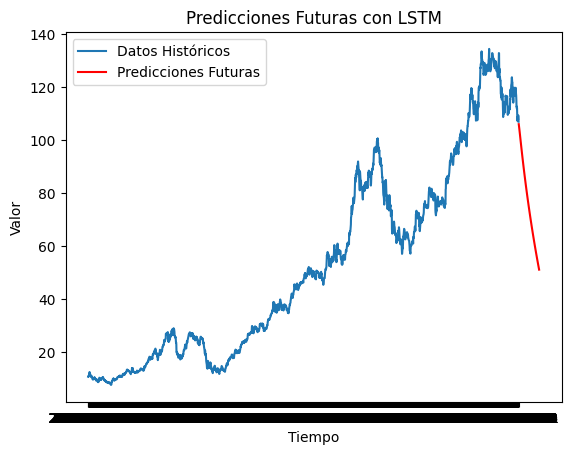

In [ ]:
rango_tiempo_futuro = np.arange(len(set_entrenamiento), len(set_entrenamiento) + len(predicciones_futuras1))

# Graficar los datos históricos (en su escala original)
plt.plot(set_entrenamiento, label='Datos Históricos')

# Graficar las predicciones futuras (en su escala original)
plt.plot(rango_tiempo_futuro, predicciones_futuras1, label='Predicciones Futuras', color='red')

# Añadir título y leyenda
plt.title('Predicciones Futuras con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()